# Simple interactive example of diffusion problem

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
from ipywidgets import interactive
from IPython.display import Audio, display
plt.rcParams['figure.figsize'] = [16., 12.]
plt.rcParams['font.size'] = 16

In [2]:
# Define model and diffusion parameters:
nt = 200
L = 1.
nx = 200
dx = L/nx
kappa = 1E-6
dt = dx**2 / (4 * kappa)
xvals = np.linspace(0,L,nx)
u_max = 10.
sigma = 0.05
offset = 0.5
dt, dx

(6.250000000000001, 0.005)

In [3]:
# initial peak
u_init = u_max * np.exp(-((xvals-0.5) / sigma)**2)

In [4]:
def explicit_iteration(u, beta):
    """Perform one iteration of the explicit algorithm"""
    u_kp1 = u[:]
    u_kp1[1:-1] = beta * u[0:-2] + (1 - 2 * beta) * u[1:-1] + beta * u[2:]
     

In [7]:
def diff_problem(beta, nt=200, plot=True):
    # to generate the figure:
    u = u_init.copy()
    for i in range(nt):
        explicit_iteration(u, beta)
        # Trick to plot only every 10th iteration:
        if plot:
            if np.mod(i,200/10.) == 0: 
                plt.plot(xvals, u, color=plt.cm.copper_r(i/nt), lw=2)
    if plot: plt.show()

In [8]:
v = interactive(diff_problem, beta=(0.1,0.8,0.025), nt=(20,800,10))
display(v)

A Jupyter Widget

## Calculation on basis of dt, kappa, dx

In [9]:
def diff_problem_phys(kappa=-6, dt=6.25, dx10=0.05, nt=20):
    # to generate the figure:
    fig = plt.figure(figsize=(12,7))
    ax = fig.add_subplot(111)
    u = u_init.copy()
    dx = dx10/10. # strange scaling required for sliders
    beta = 10**kappa * dt / dx**2
    for i in range(nt):
        explicit_iteration(u, beta)
        # Trick to plot only every 10th iteration:
        if np.mod(i,200/10.) == 0: 
            ax.plot(xvals, u, color=plt.cm.copper_r(i/nt), lw=2)
    plt.show()
    return dx

In [10]:
v = interactive(diff_problem_phys,  kappa=(-7,-5.5,0.01), nt=(20,800,10), dx10=(0.03,0.07,0.001))
display(v)

A Jupyter Widget

What happens? Clearly, the problem appears as a function of the three parameters $kappa$, $dt$, and $dx$ - and if you inspect the combination carefully, then you can realise that this happens as a function of the combination encapsulated in the Neumann number $\beta$!

## Implicit methods to the help

We next explore the implicit approach to solve the equation and see what happens there.

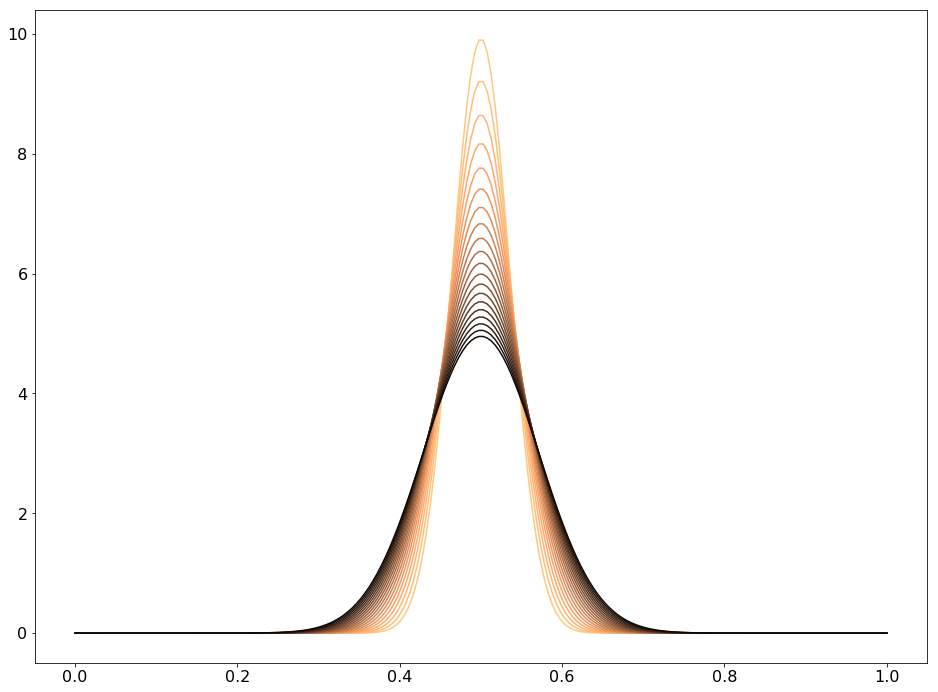

In [11]:
beta = 0.4

def diff_implicit(beta, nt=200, plot=True):
    # set up matrix B
    B = np.zeros((nx,nx))
    i,j = np.indices((nx, nx))
    B[i==j] = 1 + 2*beta
    B[i==j-1] = -beta
    B[i==j+1] = -beta
    u_init = u_max * np.exp(-((xvals-0.5) / sigma)**2)
    # boundary conditions:
    b_0 = 0.
    b_1 = 0.
    b = np.zeros(nx)
    b[0] = b_0
    b[-1] = b_1

    # re-initialise
    u = u_init.copy()
    for i in range(nt):
        u = np.linalg.solve(B, u + beta*b)
        # u[0] = b_0
        # u[-1] = b_1
        if plot:
            if np.mod(i,10) == 0: plt.plot(xvals, u, color=plt.cm.copper_r(i/float(nt)))
        # if i == 0: break
    if plot: plt.show()

diff_implicit(beta)

In [12]:
v = interactive(diff_implicit, beta=(0.1,0.8,0.025), nt=(20,800,10))
display(v)

A Jupyter Widget

Now, the problem the restriction for $\beta \le 0.5$ does not exist anymore!

So: why would one not use the implicit method all the time?

In [37]:
%%timeit
diff_problem(0.4, plot=False)

1000 loops, best of 3: 935 µs per loop


In [38]:
%%timeit
diff_implicit(0.4, plot=False)

10 loops, best of 3: 42.5 ms per loop
